#### Pridicting Heart Disease by using Principal Component Analysis (PCA)

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Perform PCA and find the variance from 2 components


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [1]:
# import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data
df = pd.read_csv(r'C:\Users\StrLab 4\heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No null values exist in the dataset
All the the data features are numerical and there is no categorical data

# EDA analysis

## Univariate analysis

In [4]:
# import the librabrary to avoid the updated errors

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [5]:
#print the all the columns in datasets

cols = df.select_dtypes(include=np.number).columns
cols1=cols[0:(len(cols)-1)]
cols1

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

### Count data in every feature

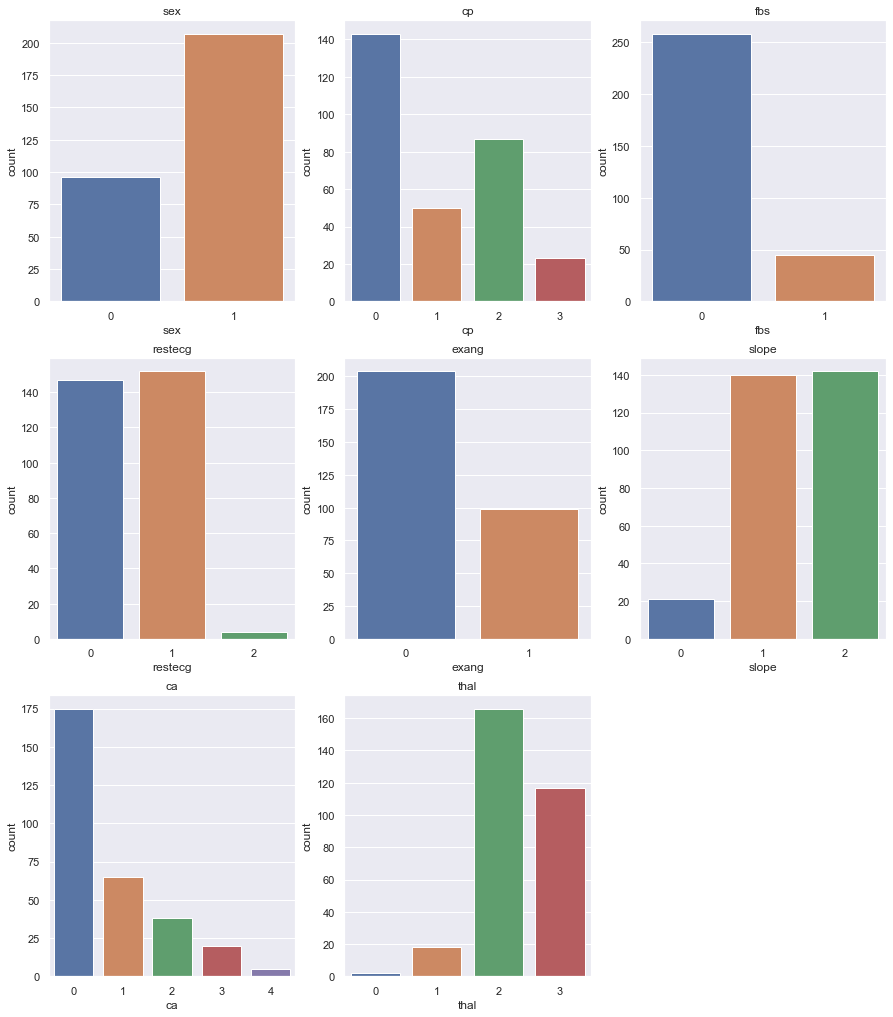

In [39]:
df1 = df[[ 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']]
fig1 = plt.figure(figsize=(15,30))
plt.legend([], loc ="lower right")
sns.set(font_scale=1)
for i  in enumerate(df1):
  plt.subplot(5,3,i[0]+1)
  ax = sns.countplot(i[1],data=df1).set(title='{}'.format(i[1]))
plt.show()

<AxesSubplot:title={'center':' Number of Patients by Age '}, xlabel='age'>

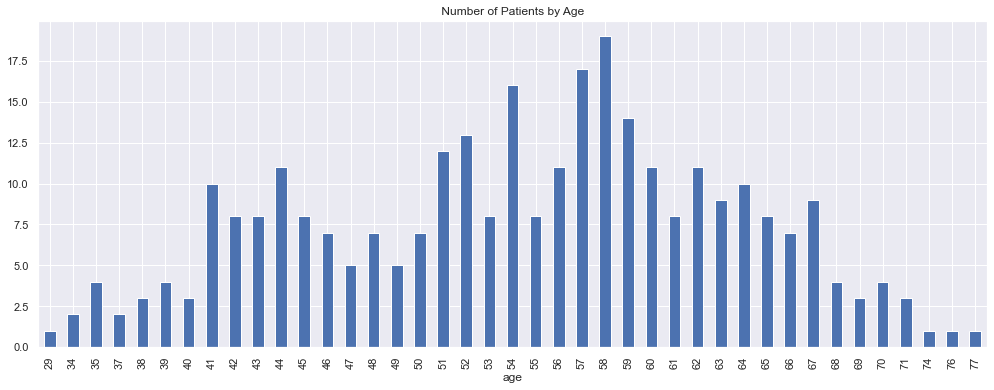

In [7]:
# make groupby and bar graph to number of patients by age. 

df.groupby('age')["target"].count().plot(kind="bar",figsize=(17,6), title=" Number of Patients by Age ")

The number of patients between 50-61 of age having more prone to target variable.

Text(0.5, 1.0, 'Distritbution by Age')

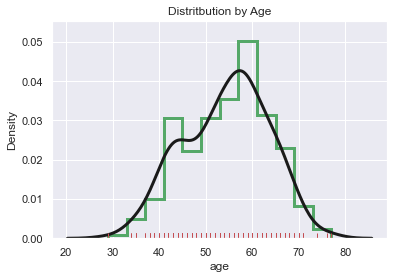

In [8]:
ax = sns.distplot(df['age'], rug=True, rug_kws={"color": "r"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
ax.set_title('Distritbution by Age')

# Bivariate analysis

<AxesSubplot:title={'center':'Gender Distribution'}, ylabel='target'>

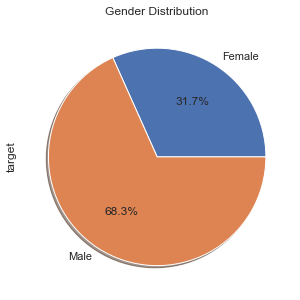

In [9]:
labels = ['Female' , 'Male']

df.groupby('sex')["target"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(5,5),title="Gender Distribution" , labels = labels)

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

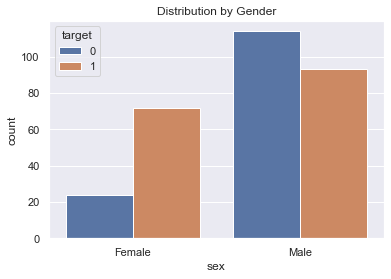

In [10]:
fig = sns.countplot(x='sex', hue=df['target'], data=df)
fig.set_title('Distribution by Gender')
fig.set_xticklabels(['Female', 'Male'])

Percentage of male to be disease tested more and identified cases are more in males.¶
percent of positives in female tested more

<AxesSubplot:title={'center':'Chest Pain Type Distribution'}, ylabel='target'>

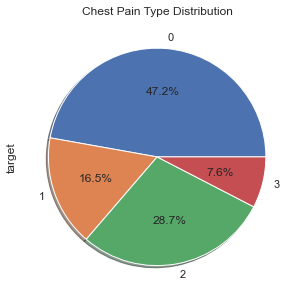

In [11]:
df.groupby('cp')['target'].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(5,5),title="Chest Pain Type Distribution") 

Text(0.5, 0, 'Chest Pain Type')

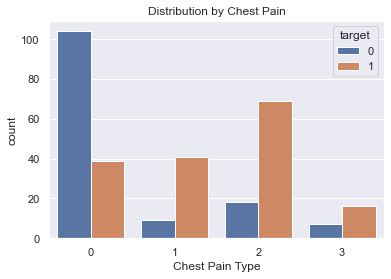

In [12]:
fig = sns.countplot(x='cp', hue=df['target'], data=df)
fig.set_title('Distribution by Chest Pain')
fig.set_xlabel('Chest Pain Type')

### Zero test pain has more data collected and the 0,1,2 had maximim chances of postive result.

<AxesSubplot:title={'center':'fasting blood sugar'}, ylabel='target'>

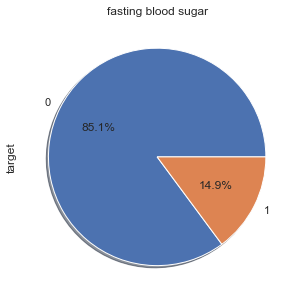

In [13]:
df.groupby('fbs')["target"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(5,5),title="fasting blood sugar")

[Text(0, 0, 'fbs < 120mg/dl'), Text(1, 0, 'fbs > 120mg/dl')]

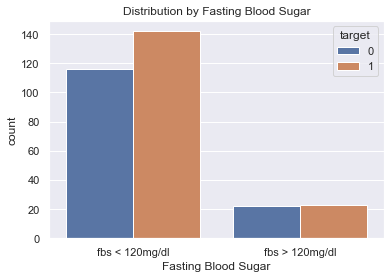

In [14]:
fig = sns.countplot(x='fbs', hue=df['target'], data=df)
fig.set_title('Distribution by Fasting Blood Sugar')
fig.set_xlabel('Fasting Blood Sugar')
fig.set_xticklabels(['fbs < 120mg/dl','fbs > 120mg/dl'])

### in the fbs<120 mg/l the positive cases are more and in fbs>120 the posivity rate is 50 %

<AxesSubplot:title={'center':'Electrocardiographic Results Distribion'}, ylabel='target'>

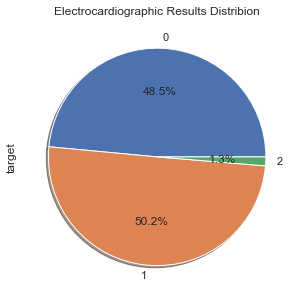

In [15]:
df.groupby('restecg')["target"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True, figsize=(5,5),title="Electrocardiographic Results Distribion")

[Text(0, 0, 'Hypertrophy'),
 Text(1, 0, 'Normal'),
 Text(2, 0, 'ST-T Wave Abnormality')]

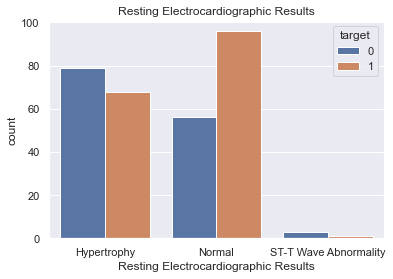

In [16]:
fig = sns.countplot(x='restecg', hue=df['target'], data=df)
fig.set_title('Resting Electrocardiographic Results')
fig.set_xlabel('Resting Electrocardiographic Results')
fig.set_xticklabels(['Hypertrophy','Normal','ST-T Wave Abnormality'])

### restcg is normal category had maximum data and in normal category positivity rate is more.

<AxesSubplot:title={'center':'Exercise Induced Angina'}, ylabel='target'>

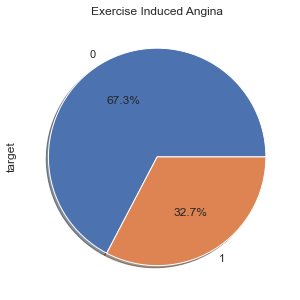

In [17]:
df.groupby('exang')["target"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True, figsize=(5,5),title="Exercise Induced Angina")

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

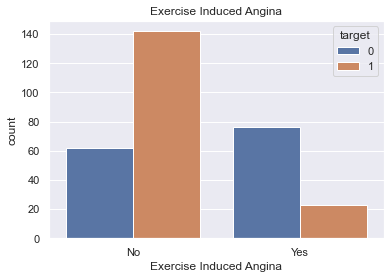

In [18]:
fig = sns.countplot(x='exang', hue=df['target'], data=df)
fig.set_title('Exercise Induced Angina')
fig.set_xlabel('Exercise Induced Angina')
fig.set_xticklabels(['No' , 'Yes'])

### In the exang data the 0 category data is more and the positivity is more in this categgory.

<AxesSubplot:title={'center':'Slope of the Peak Exercise ST Segment'}, ylabel='target'>

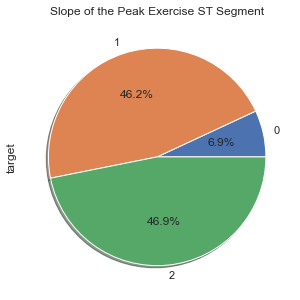

In [19]:
df.groupby('slope')["target"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True, figsize=(5,5),title="Slope of the Peak Exercise ST Segment")

[Text(0, 0, '0: Donwsloping'),
 Text(1, 0, '1:Flat '),
 Text(2, 0, '2: Upsloping ')]

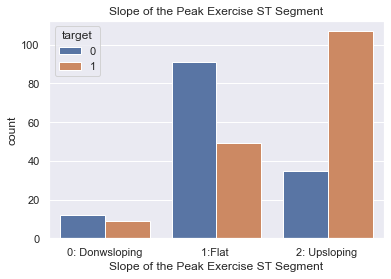

In [20]:
fig = sns.countplot(x='slope', hue=df['target'], data=df)
fig.set_title('Slope of the Peak Exercise ST Segment')
fig.set_xlabel('Slope of the Peak Exercise ST Segment')
fig.set_xticklabels(['0: Donwsloping','1:Flat ' ,'2: Upsloping ' ])

### the unsloping category in slope test are more and the same category prone to positivity more

<AxesSubplot:title={'center':'Number of Major Vessels'}, ylabel='target'>

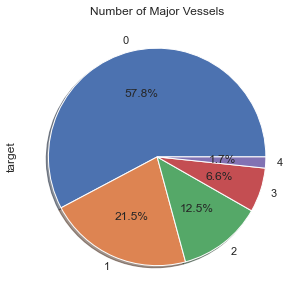

In [21]:
df.groupby('ca')["target"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True, figsize=(5,5),title="Number of Major Vessels") 

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4')]

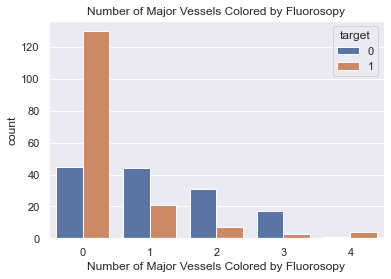

In [22]:
fig = sns.countplot(x='ca', hue=df['target'], data=df)
fig.set_title('Number of Major Vessels Colored by Fluorosopy')
fig.set_xlabel('Number of Major Vessels Colored by Fluorosopy')
fig.set_xticklabels(['0', '1' , '2', '3', '4' ])

The category 0 in ca has more tested and having the more positive rate in 0 category.

<AxesSubplot:title={'center':'Thallium Stress Test Results'}, ylabel='target'>

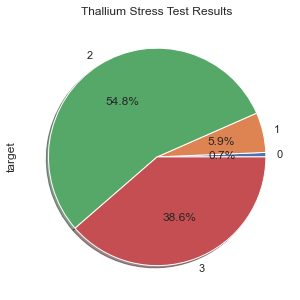

In [23]:
df.groupby('thal')["target"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True, figsize=(5,5),title="Thallium Stress Test Results")

[Text(0, 0, '0: Null'),
 Text(1, 0, '1: Fixed Defect'),
 Text(2, 0, '2: Normal'),
 Text(3, 0, '3: Reversible Defect')]

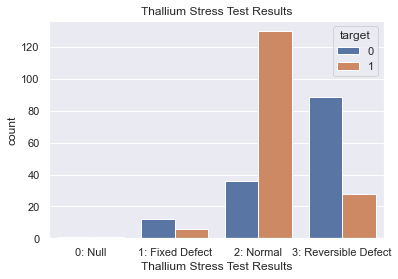

In [24]:
fig = sns.countplot(x='thal', hue=df['target'], data=df)
fig.set_title('Thallium Stress Test Results')
fig.set_xlabel('Thallium Stress Test Results')
fig.set_xticklabels(['0: Null', '1: Fixed Defect' , '2: Normal', '3: Reversible Defect' ])

The thal noral having more tested and positive rates are also more in this group.

In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


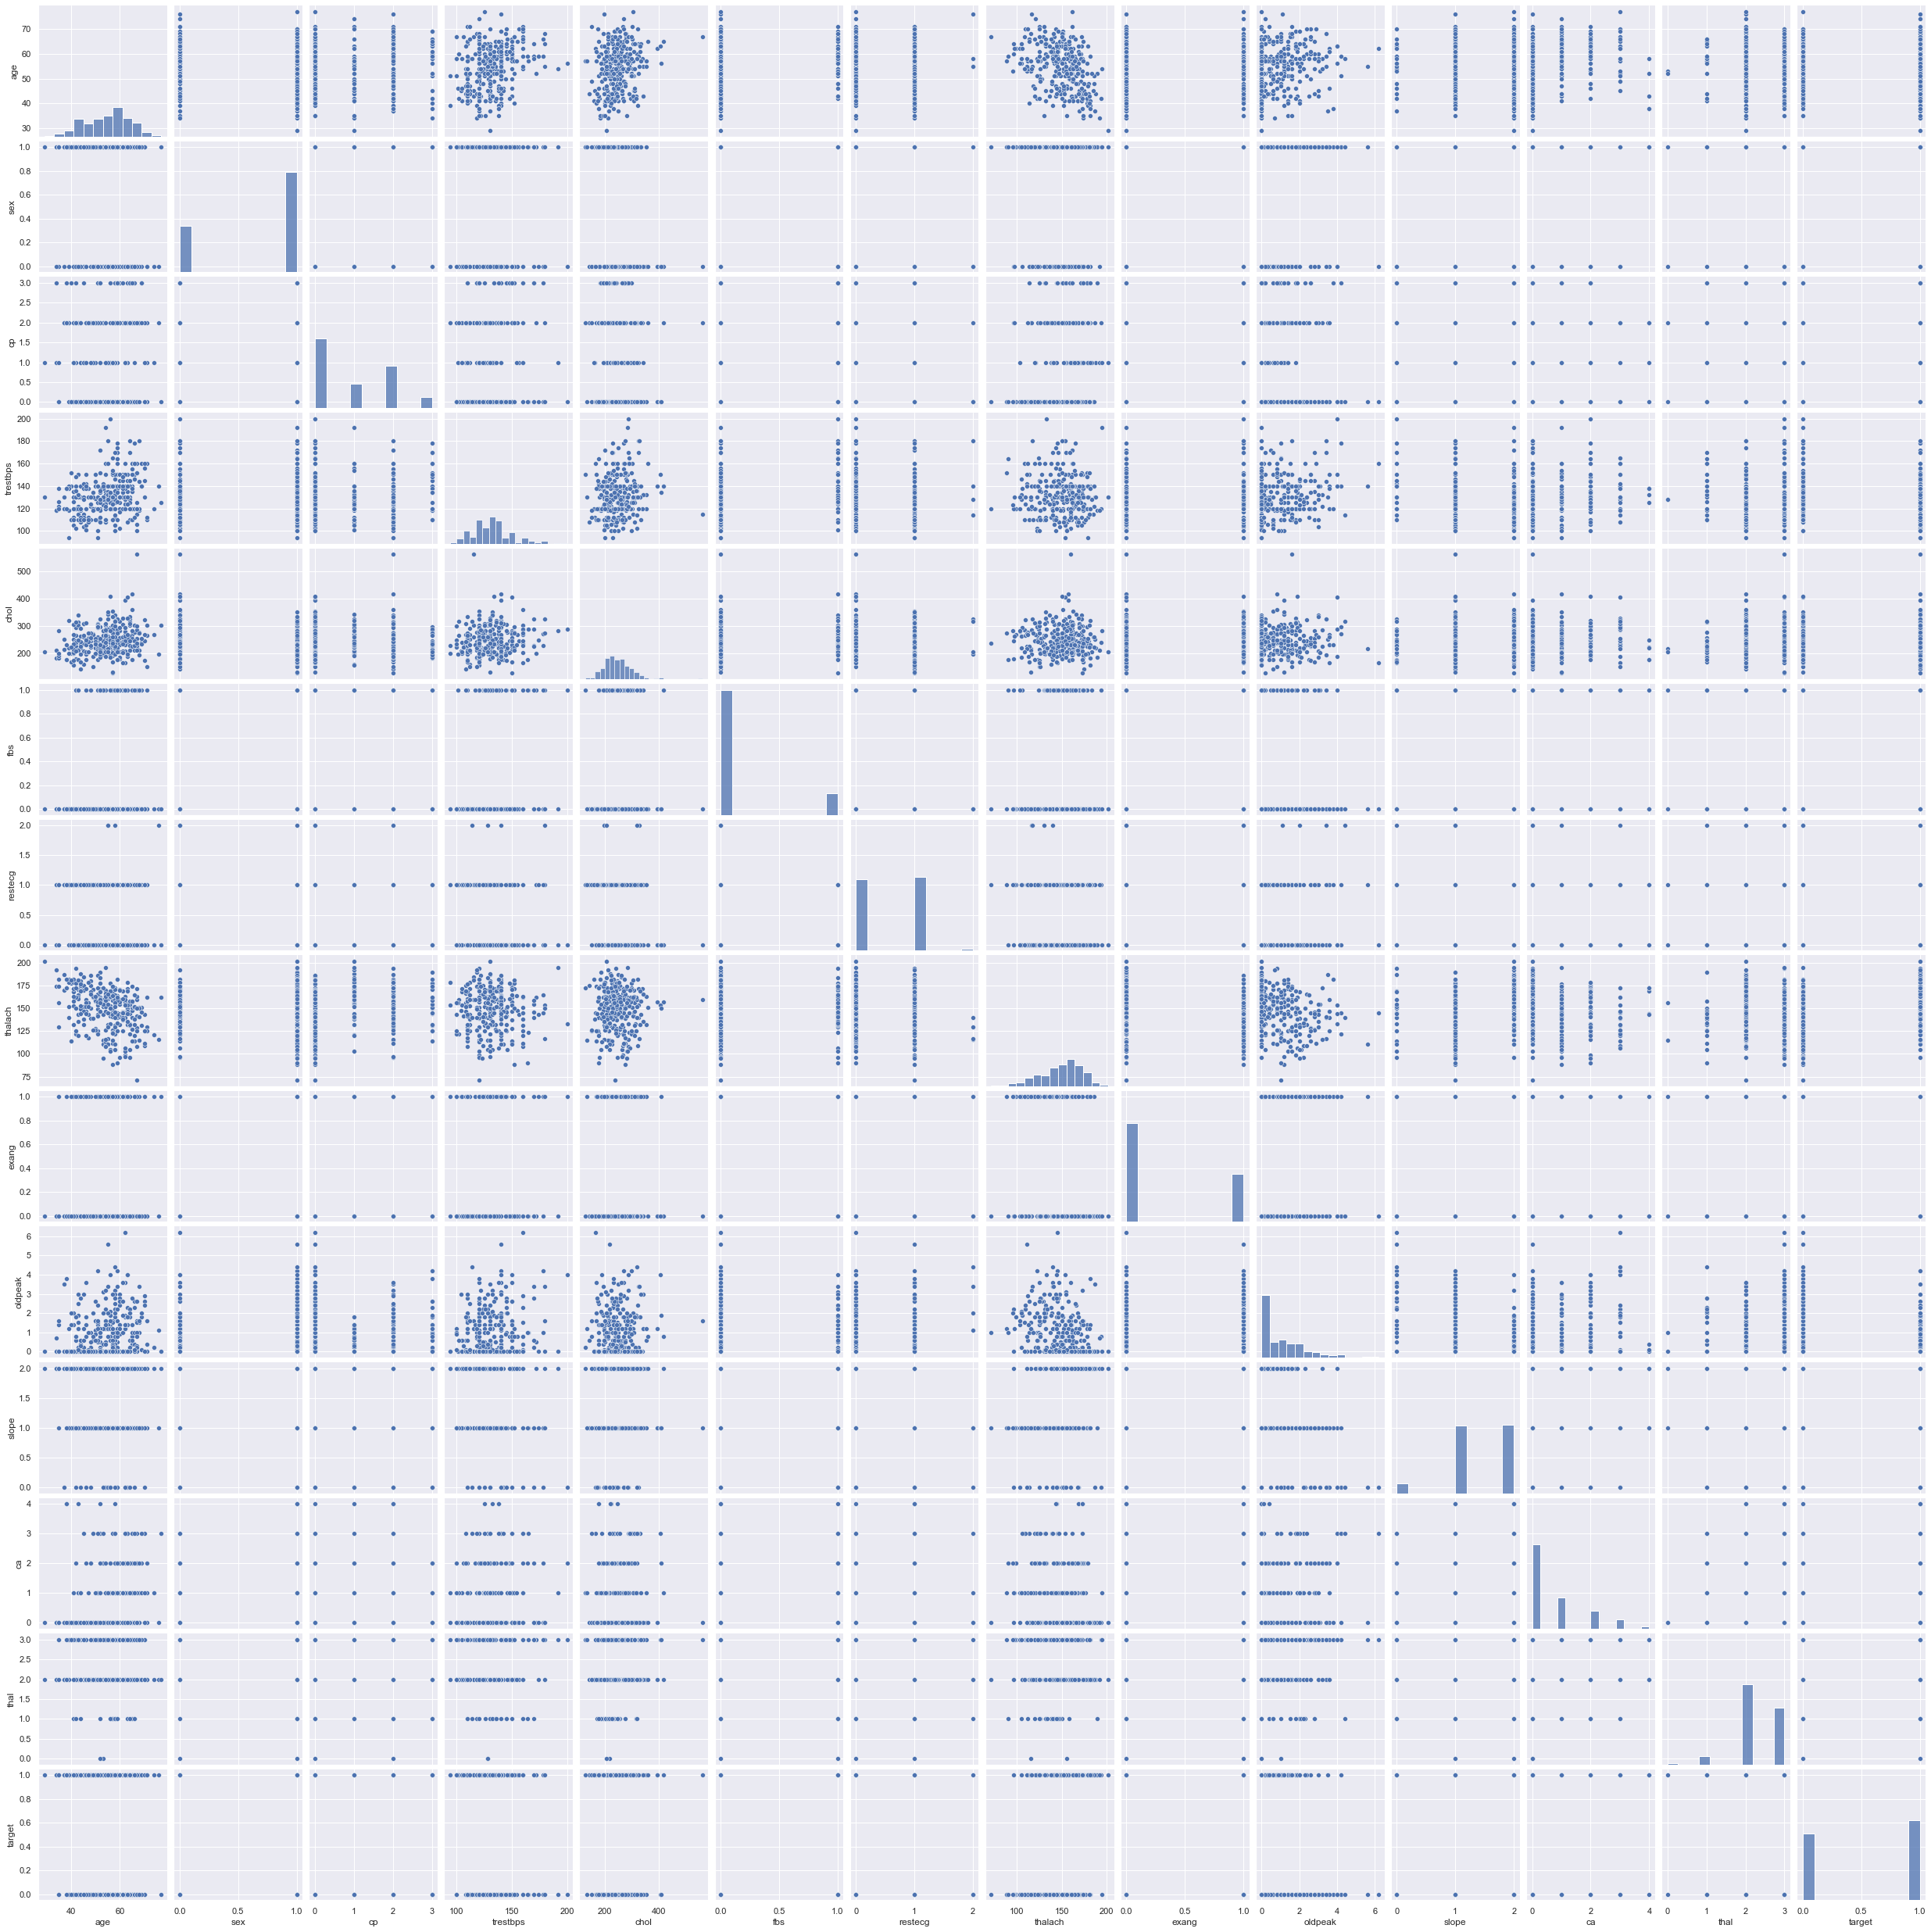

In [26]:
sns.pairplot(df)

In [27]:
# correlation of variables with target columns
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


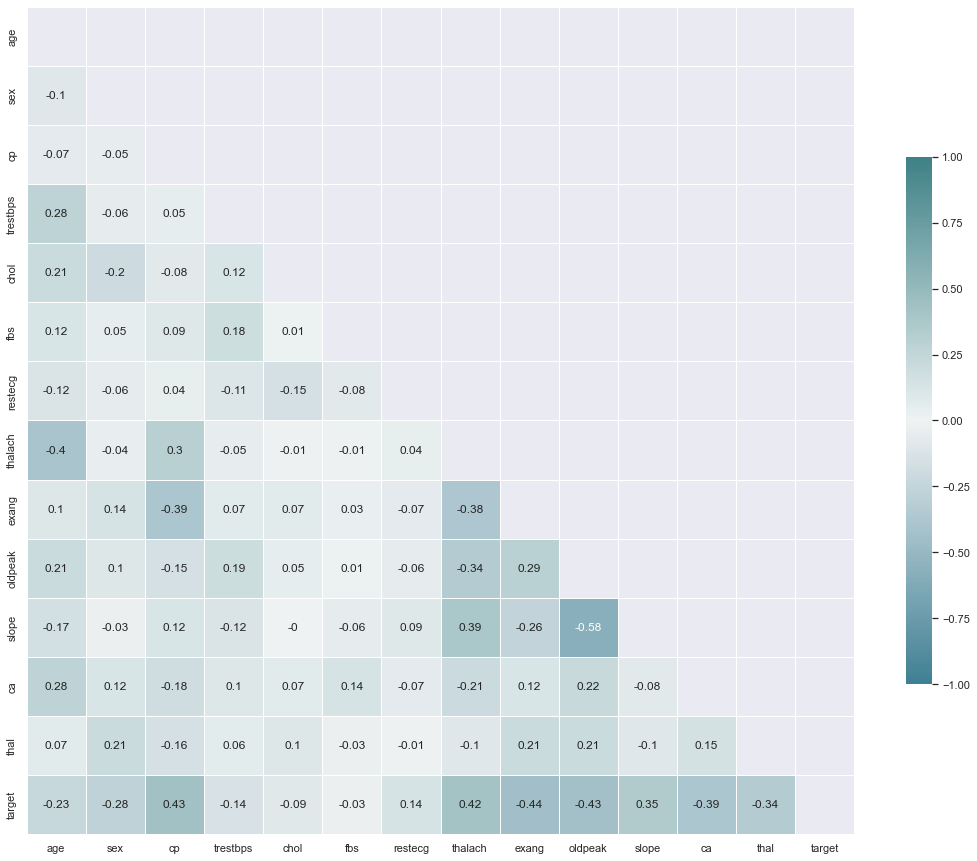

In [28]:
# Heatmap generaton 

corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f1, ax1 = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 200, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, annot=True)
plt.tight_layout()
plt.show()

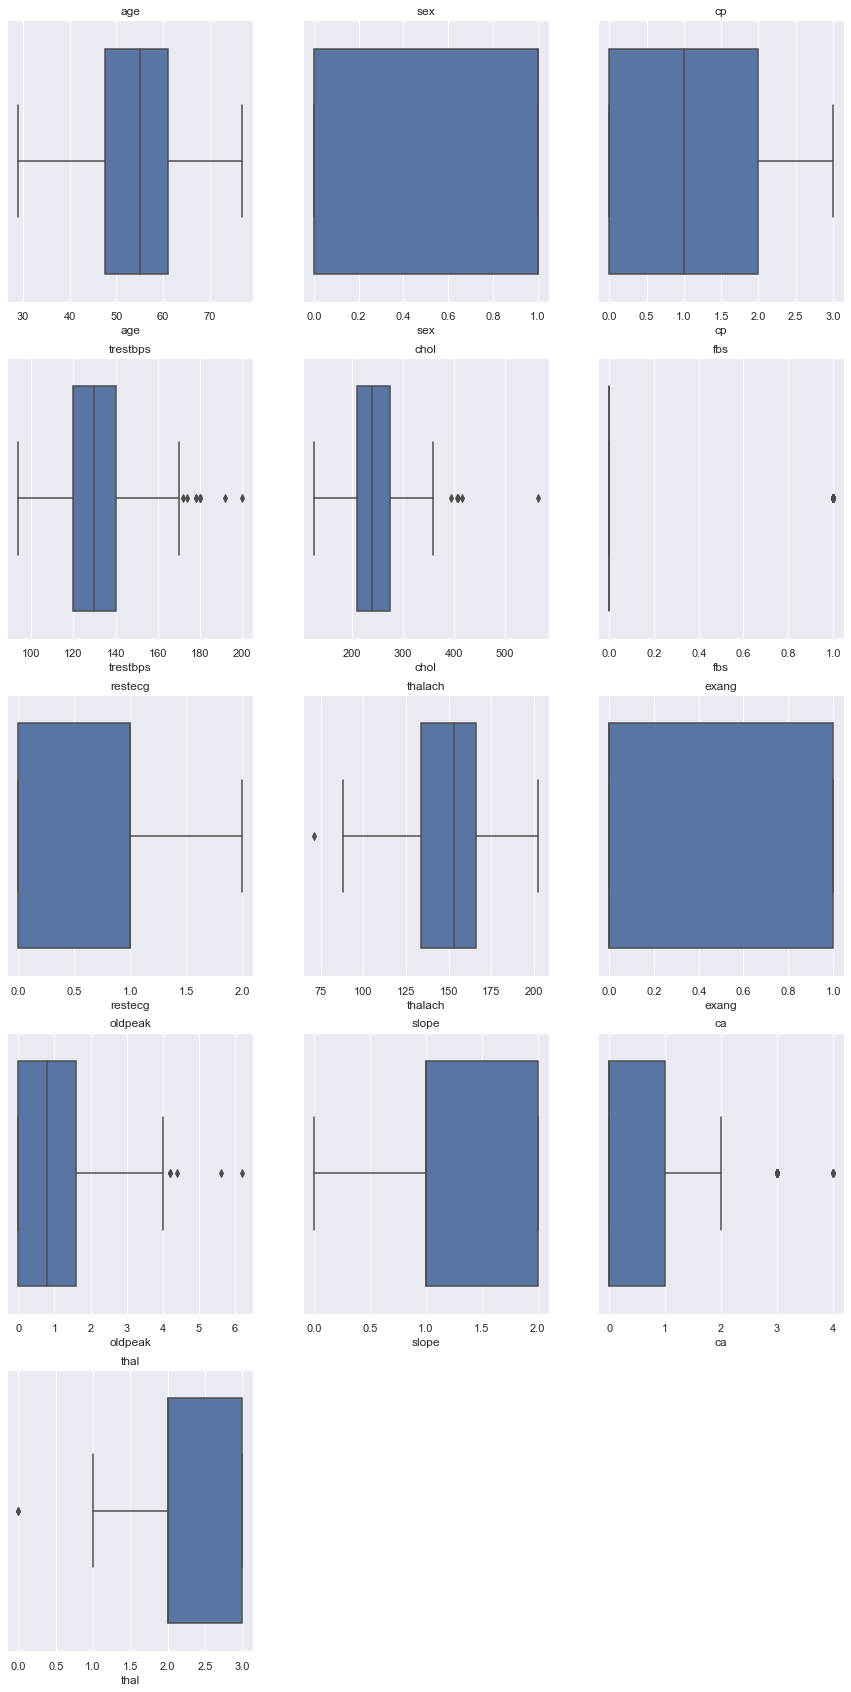

In [30]:
# Plot for the outliers in the data

df1 = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
fig2 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df1):
  plt.subplot(5,3,i[0]+1)
  ax = sns.boxplot(i[1],data=df1).set(title='{}'.format(i[1]))
plt.show()

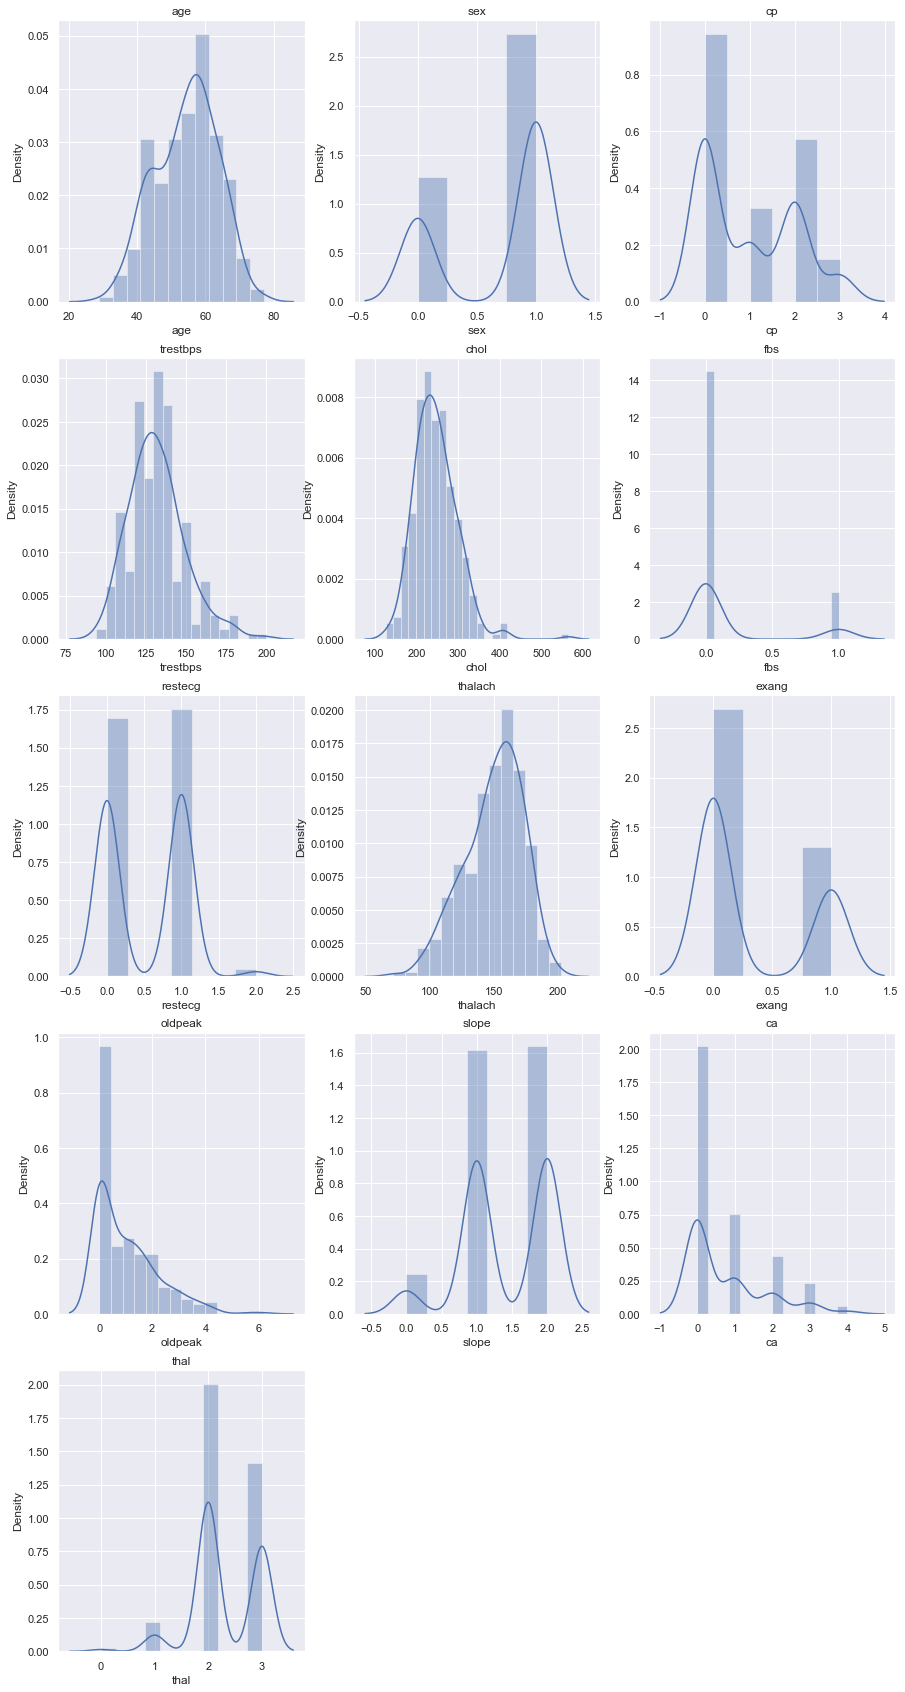

In [31]:
fig4 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df1):
  plt.subplot(5,3,i[0]+1)
  ax = sns.distplot(df1[i[1]]).set(title='{}'.format(i[1]))
plt.show()

Few of the features follow the histogram i.e., standard disributions.
Others are randomly distributed
The performance of the inferential statistics are necessary.

# Principal Component Analysis

In [32]:

from sklearn.manifold import TSNE
#importing principle component analysis from sk.learn
from sklearn.decomposition import PCA

#importing magic functio for inline programme
%matplotlib inline
import os


<AxesSubplot:title={'center':'Correlation with Target'}>

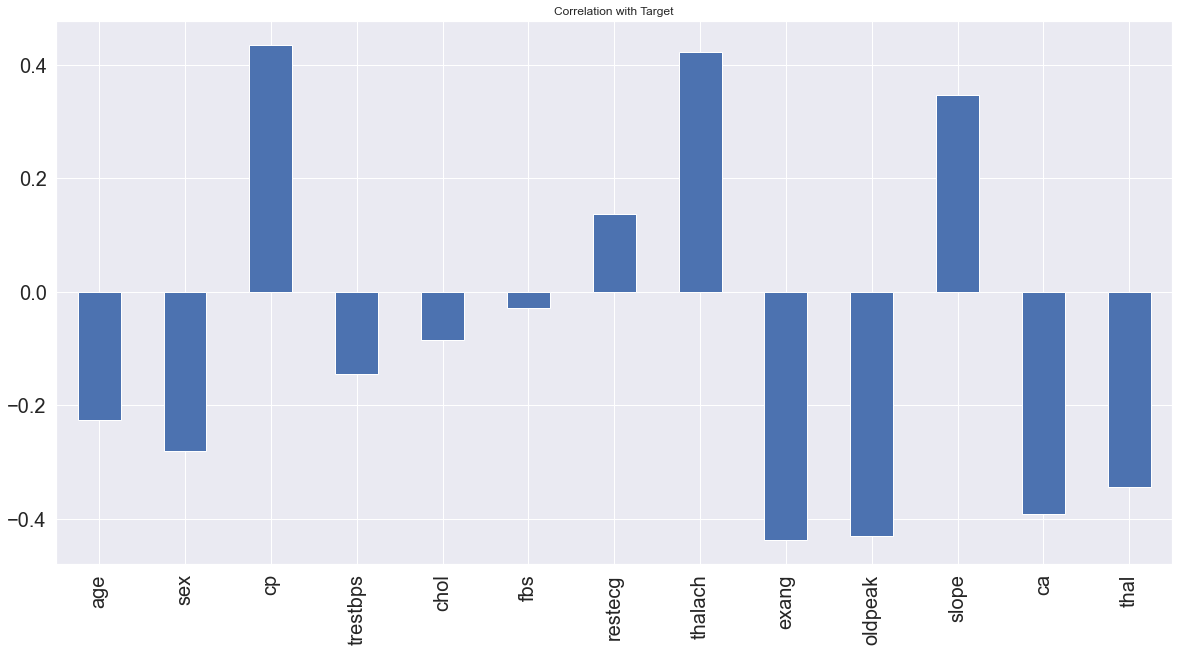

In [33]:

X=df.drop(['target'],axis=1)
X.corrwith(df['target']).plot.bar(
 figsize = (20, 10), title = "Correlation with Target", fontsize = 20,
 rot = 90, grid = True)


In [34]:

feat=df.drop(['target'],axis=1)


In [35]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(feat.values)


Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

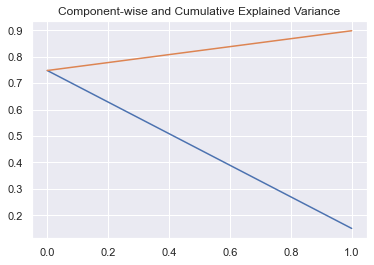

In [36]:

plt.plot(range(2), pca.explained_variance_ratio_)
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")


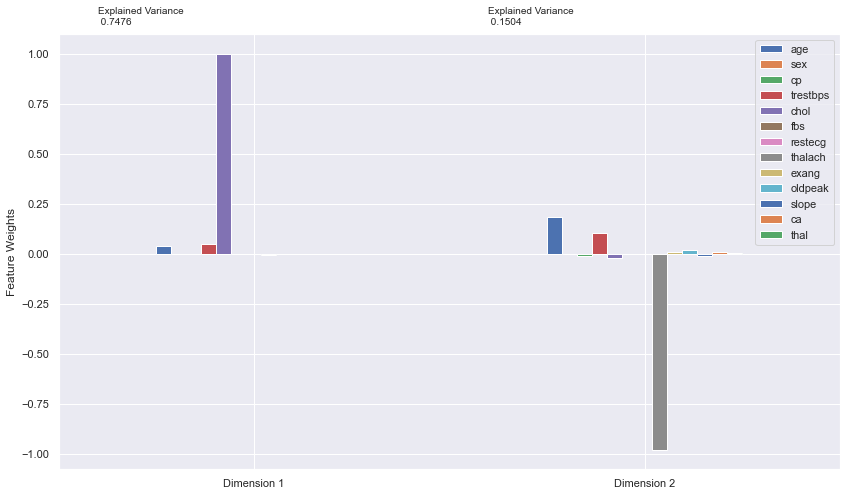

In [37]:

def pca_results(good_data, pca):
 '''
 Create a DataFrame of the PCA results
 Includes dimension feature weights and explained variance
 Visualizes the PCA results
 '''
# Dimension indexing
 dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
# PCA components
 components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
 components.index = dimensions
 # PCA explained variance
 ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
 variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
 variance_ratios.index = dimensions
# Create a bar plot visualization
 fig, ax = plt.subplots(figsize = (14,8))
# Plot the feature weights as a function of the components
 components.plot(ax = ax, kind = 'bar');
 ax.set_ylabel("Feature Weights")
 ax.set_xticklabels(dimensions, rotation=0)
# Display the explained variance ratios
 for i, ev in enumerate(pca.explained_variance_ratio_):
     ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
# Return a concatenated DataFrame
 return pd.concat([variance_ratios, components], axis = 1)
pca_results = pca_results(feat, pca)


In [40]:
from sklearn.decomposition import PCA

In [59]:
dfx = pd.DataFrame(data=X,columns=df.columns[0:-1])



In [60]:
dfx.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [61]:
pca = PCA(n_components=None)

In [62]:
dfx_pca = pca.fit(dfx)

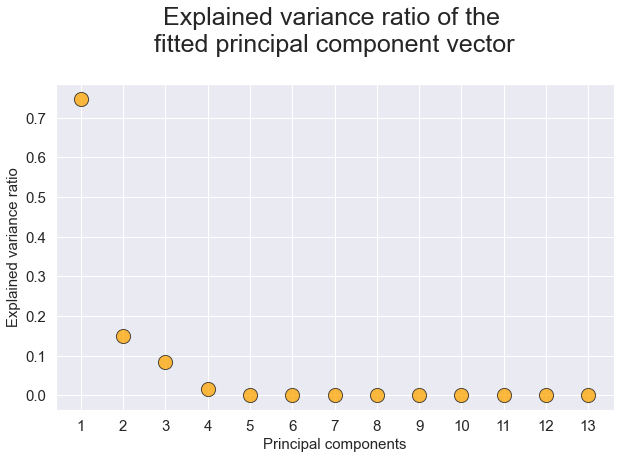

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The above plot means that the 1st 
 principal component explains about 75% of the total variance in the data and the 2nd
 component explians further 15%. Therefore, if we just consider first two components, they together explain 90% of the total variance.

In [64]:
dfx_trans = pca.transform(dfx)

In [65]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-12.267345,2.873838,14.969879,6.892940,-0.072468,2.664652,0.268713,1.084704,-0.924199,0.473778,0.731103,-0.290394,0.512576
1,2.690137,-39.871374,0.877882,-10.583598,2.598773,2.460497,-0.207808,0.519390,0.194345,0.574327,0.404207,-0.425920,-0.148125
2,-42.950214,-23.636820,1.759446,-7.786655,0.436244,0.296905,-0.437425,0.514733,-0.210274,-0.619716,-0.915397,0.217828,0.079759
3,-10.944756,-28.438036,-7.044180,8.328134,0.076565,0.135460,-0.677191,0.074112,0.431605,-0.405790,0.377702,-0.246167,-0.048669
4,106.979053,-15.874468,-14.861575,3.223808,-0.242000,-0.502284,-1.188403,0.373915,0.660464,-0.147891,0.158278,0.743523,-0.060164
5,-53.647204,4.003924,11.088388,2.666733,-0.702792,-0.618374,-1.160837,1.137503,0.184408,0.298881,0.637463,-0.634800,-0.197654
6,48.082155,-3.038961,6.438759,-0.545239,-0.228223,0.613502,-0.637325,0.548709,-0.338526,0.191963,-0.580603,-0.120026,-0.086127
7,15.566059,-26.274564,-10.574371,-5.009837,-0.430219,-0.308599,-0.251104,-0.873200,0.399694,-0.042197,0.063964,-0.299555,0.021019
8,-45.438896,-7.429777,43.359719,-4.798219,-1.137315,0.225307,0.098061,-0.982581,0.427410,-0.167899,0.164658,-0.130922,0.804985
9,-77.316316,-19.910076,25.506299,6.260904,0.061074,0.936172,-0.288774,0.005343,0.526401,-0.673565,0.243631,-0.109279,-0.140599


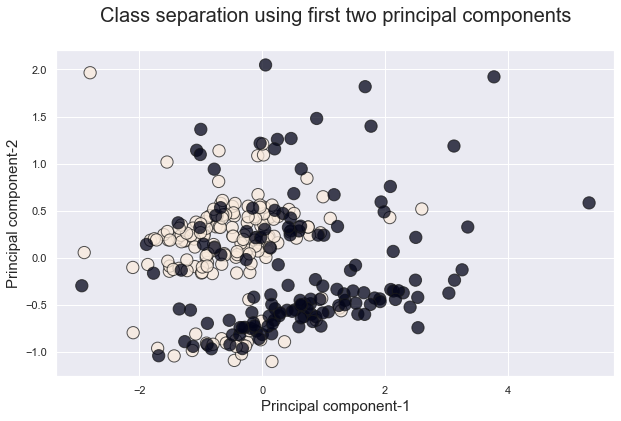

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[4],dfx_trans[7],c=df['target'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()